<a href="https://colab.research.google.com/github/isha-dutta/E-commerce_website/blob/main/TTLproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
path = "/content/drive/MyDrive/mbti_1.csv"
dataset = pd.read_csv(path)

dataset.describe()

,type,posts
count,8675,8675
unique,16,8675
top,INFP,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
freq,1832,1


In [ ]:
import pandas as pd
import numpy as np
from numpy import asarray
from numpy import savetxt
from numpy import loadtxt
import pickle as pkl
from scipy import sparse

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import wordcloud
from wordcloud import WordCloud, STOPWORDS

In [ ]:
import re
import itertools
import string
import collections
from collections import Counter
from sklearn.preprocessing import LabelEncoder
import nltk
from nltk.classify import NaiveBayesClassifier
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from tqdm import tqdm

In [ ]:
import sklearn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
import sklearn.cluster as cluster
from sklearn.manifold import TSNE

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC,LinearSVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from xgboost import plot_importance
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, accuracy_score, balanced_accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, multilabel_confusion_matrix, confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
import warnings
warnings.filterwarnings("ignore")

## Loading Dataset

In [ ]:
dataset.head()

,type,posts
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1,ENTP,'I'm finding the lack of me in these posts ver...
2,INTP,'Good one _____ https://www.youtube.com/wat...
3,INTJ,"'Dear INTP, I enjoyed our conversation the o..."
4,ENTJ,'You're fired.|||That's another silly misconce...


In [ ]:
dataset.tail()

,type,posts
8670,ISFP,'https://www.youtube.com/watch?v=t8edHB_h908||...
8671,ENFP,'So...if this thread already exists someplace ...
8672,INTP,'So many questions when i do these things. I ...
8673,INFP,'I am very conflicted right now when it comes ...
8674,INFP,'It has been too long since I have been on per...


## Exploratory Data Analysis

## Checking for missing values

In [ ]:
dataset.isnull().any()

type     False
posts    False
dtype: bool

## Size of dataset

In [ ]:
nRow,nCol=dataset.shape

In [ ]:
print("No of rows", nRow)
print("No of columns", nCol)

No of rows 8675
No of columns 2


## Dataset Information

In [ ]:
dataset.dtypes

type     object
posts    object
dtype: object

In [ ]:
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8675 entries, 0 to 8674
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   type    8675 non-null   object
 1   posts   8675 non-null   object
dtypes: object(2)
memory usage: 135.7+ KB
None


In [ ]:
dataset.describe(include=['object'])

,type,posts
count,8675,8675
unique,16,8675
top,INFP,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
freq,1832,1


In [ ]:
types=np.unique(np.array(dataset['type']))
print(types)

['ENFJ' 'ENFP' 'ENTJ' 'ENTP' 'ESFJ' 'ESFP' 'ESTJ' 'ESTP' 'INFJ' 'INFP'
 'INTJ' 'INTP' 'ISFJ' 'ISFP' 'ISTJ' 'ISTP']


In [ ]:
total=dataset.groupby(['type']).count()
total

,posts
type,
ENFJ,190
ENFP,675
ENTJ,231
ENTP,685
ESFJ,42
ESFP,48
ESTJ,39
ESTP,89
INFJ,1470


## Data Visualization

Text(0.5, 1.0, 'Total posts for each personality type')

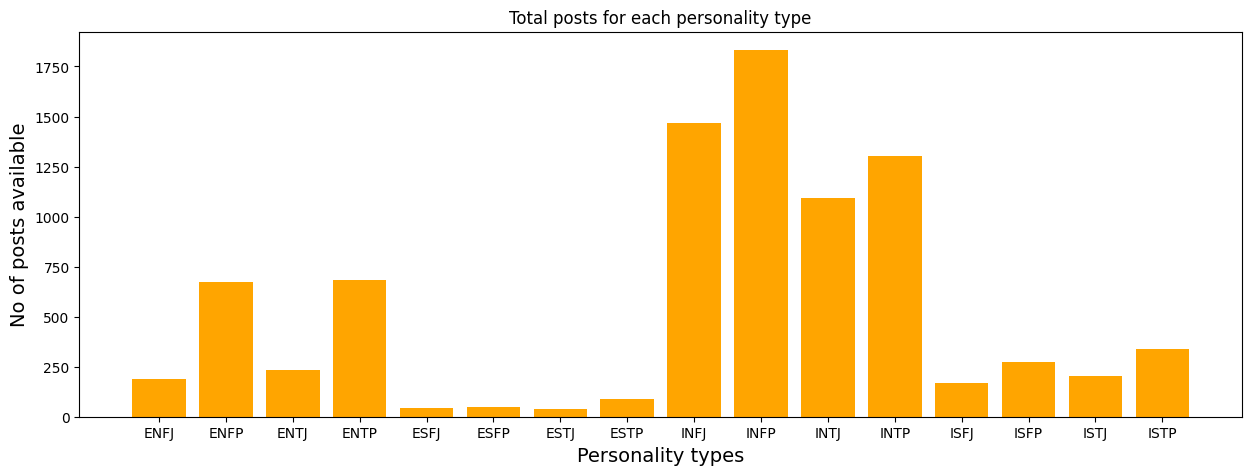

In [ ]:
plt.figure(figsize=(15,5))
plt.bar(np.array(total.index),height=total['posts'],color='orange')
plt.xlabel('Personality types',size=14)
plt.ylabel('No of posts available',size=14)
plt.title('Total posts for each personality type')

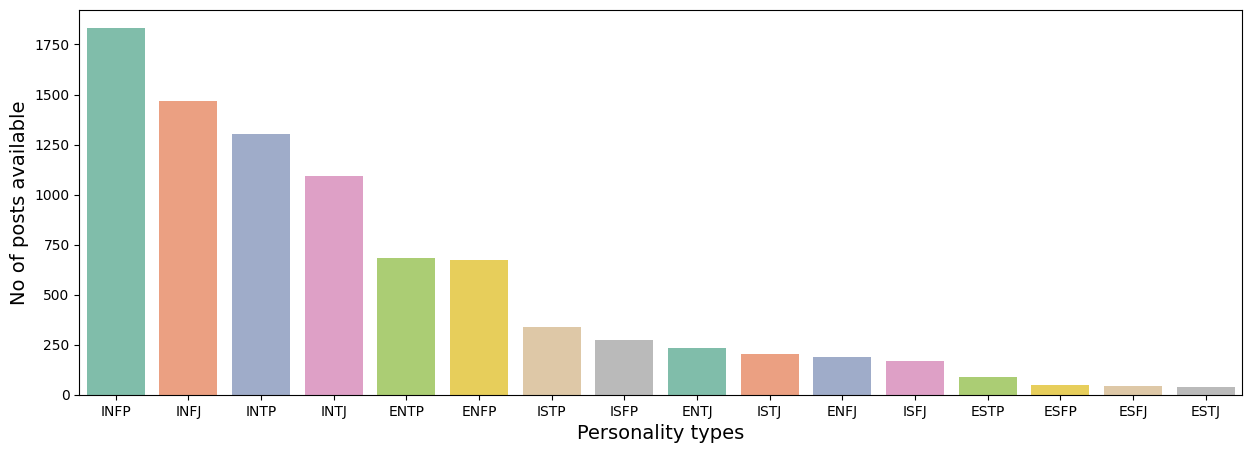

In [ ]:
cnt_srs=dataset['type'].value_counts()
plt.figure(figsize=(15,5))
sns.barplot(x=cnt_srs.index,y=cnt_srs.values,alpha=0.9, palette = 'Set2')
plt.xlabel('Personality types',fontsize=14)
plt.ylabel('No of posts available',fontsize=14)
plt.show()

Text(0.5, 1.0, 'Distribution of Lengths of all 50 posts')

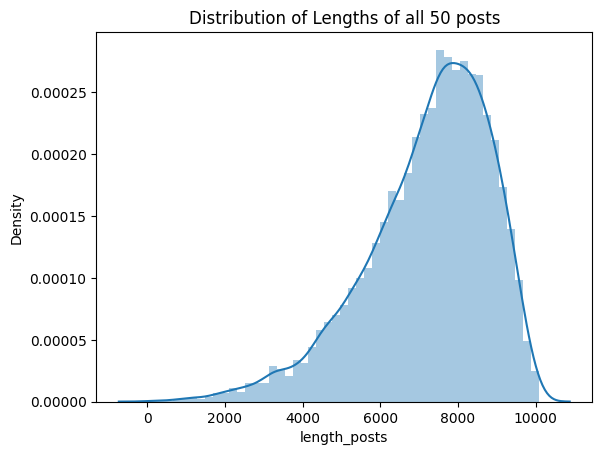

In [ ]:
dataset["length_posts"]=dataset["posts"].apply(len)
sns.distplot(dataset["length_posts"]).set_title("Distribution of Lengths of all 50 posts")

## Finding most common words in all posts

In [ ]:
words=list(dataset["posts"].apply(lambda x:x.split()))
words=[x for y in words for x in y]
Counter(words).most_common(50)

[('I', 387957),
 ('to', 290168),
 ('the', 270699),
 ('a', 230918),
 ('and', 219498),
 ('of', 177853),
 ('is', 128804),
 ('you', 128750),
 ('that', 127221),
 ('in', 117263),
 ('my', 104561),
 ('it', 93101),
 ('for', 83057),
 ('have', 79784),
 ('with', 77131),
 ('but', 74729),
 ('be', 69317),
 ('are', 65034),
 ('like', 61390),
 ('not', 59496),
 ('an', 59020),
 ("I'm", 57339),
 ('on', 57062),
 ('was', 56146),
 ('me', 55488),
 ('as', 53310),
 ('this', 52601),
 ('just', 48292),
 ('about', 46305),
 ('think', 46229),
 ('or', 45724),
 ("don't", 44821),
 ('so', 42935),
 ('your', 40918),
 ('do', 40867),
 ('what', 37746),
 ('at', 37566),
 ('can', 37535),
 ('if', 37042),
 ('people', 35546),
 ('when', 34389),
 ('would', 32605),
 ('really', 31369),
 ('all', 31344),
 ('more', 31188),
 ('know', 31130),
 ('they', 29386),
 ('get', 28948),
 ('because', 27438),
 ('am', 27109)]

## Splitting the dataset into training and test data

In [ ]:
train_data,test_data=train_test_split(dataset,test_size=0.2,random_state=42,stratify=dataset.type)

## PreProcessing

## Cleaning text data

In [ ]:
def clear_text(dataset):
    data_length=[]
    lemmatizer=WordNetLemmatizer()
    cleaned_text=[]
    for sentence in tqdm(dataset.posts):
        sentence=sentence.lower()
        sentence=re.sub('https?://[^\s<>"]+|www\.[^\s<>"]+',' ',sentence)
        sentence=re.sub('[^0-9a-z]',' ',sentence)
        data_length.append(len(sentence.split()))
        cleaned_text.append(sentence)
    return cleaned_text,data_length

In [ ]:
train_data.posts,train_length=clear_text(train_data)

100%|██████████| 6940/6940 [00:05<00:00, 1227.42it/s]


In [ ]:
test_data.posts,test_length=clear_text(test_data)

100%|██████████| 1735/1735 [00:01<00:00, 1211.55it/s]


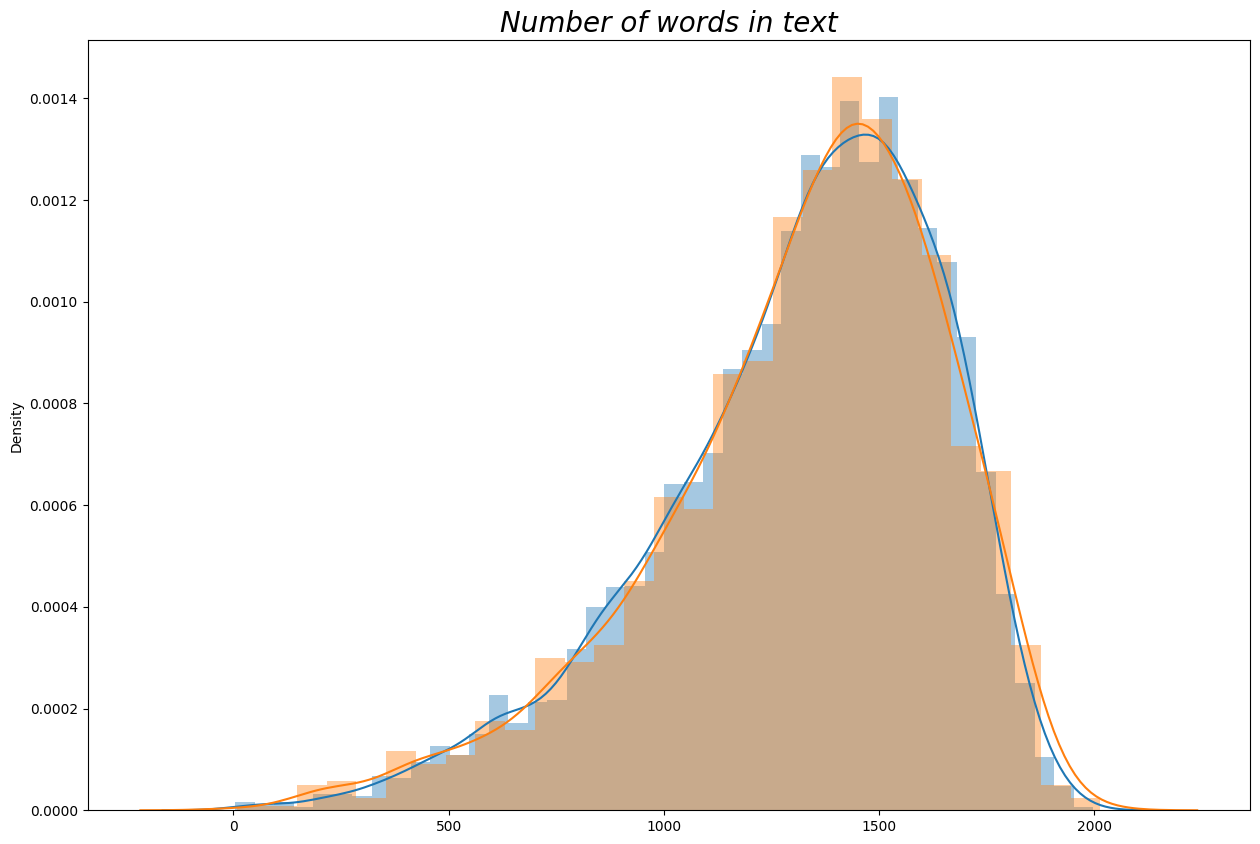

In [ ]:
plt.figure(figsize=(15,10))
sns.distplot(train_length,label='train data word length')
sns.distplot(test_length,label='test data word length')
plt.title('Number of words in text',fontdict={'size':20,'style':'italic'})
plt.show()

In [ ]:
px.pie(train_data,names='type',title='Personality type',hole=0.3)

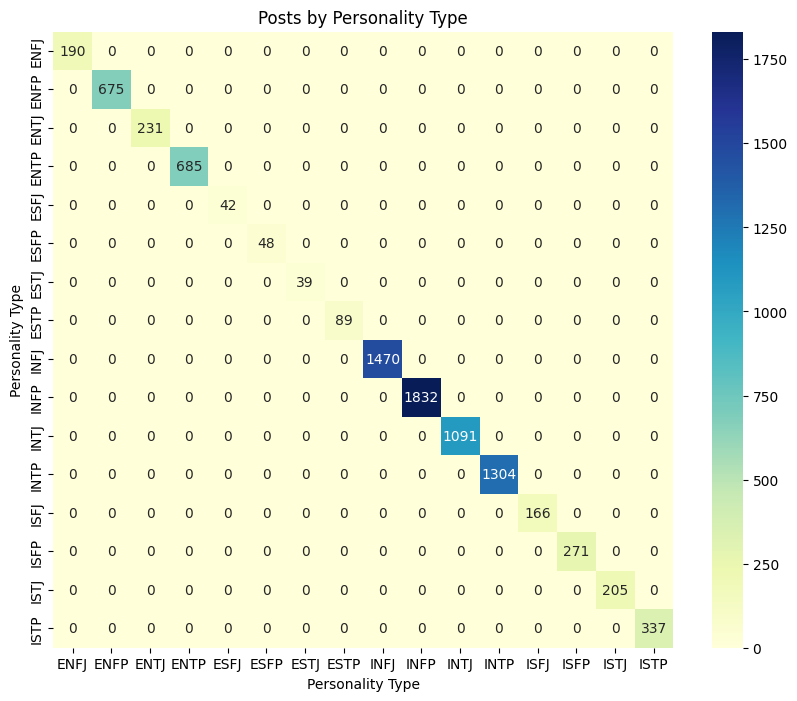

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Create a dictionary with the data
data = {
    'ENFJ': 190, 'ENFP': 675, 'ENTJ': 231, 'ENTP': 685,
    'ESFJ': 42, 'ESFP': 48, 'ESTJ': 39, 'ESTP': 89,
    'INFJ': 1470, 'INFP': 1832, 'INTJ': 1091, 'INTP': 1304,
    'ISFJ': 166, 'ISFP': 271, 'ISTJ': 205, 'ISTP': 337
}

# Convert the dictionary to a DataFrame
df = pd.DataFrame(list(data.items()), columns=['type', 'posts'])

# Create a pivot table
heatmap_data = df.pivot_table(index="type", columns="type", values="posts", aggfunc='first', fill_value=0)

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, annot=True, fmt="d", cmap="YlGnBu")
plt.title('Posts by Personality Type')
plt.xlabel('Personality Type')
plt.ylabel('Personality Type')
plt.show()

## Tokenizing Words

In [ ]:
!pip install nltk

In [ ]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
import nltk
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
def lemmatize_text(text):
    lemmatizer = WordNetLemmatizer()
    return [lemmatizer.lemmatize(w) for w in text.split()]
vectorizer = TfidfVectorizer(max_features=5000,stop_words='english',tokenizer=lemmatize_text)
vectorizer.fit(train_data.posts)

TfidfVectorizer(max_features=5000, stop_words='english',
                tokenizer=<function lemmatize_text at 0x7c322f921b40>)

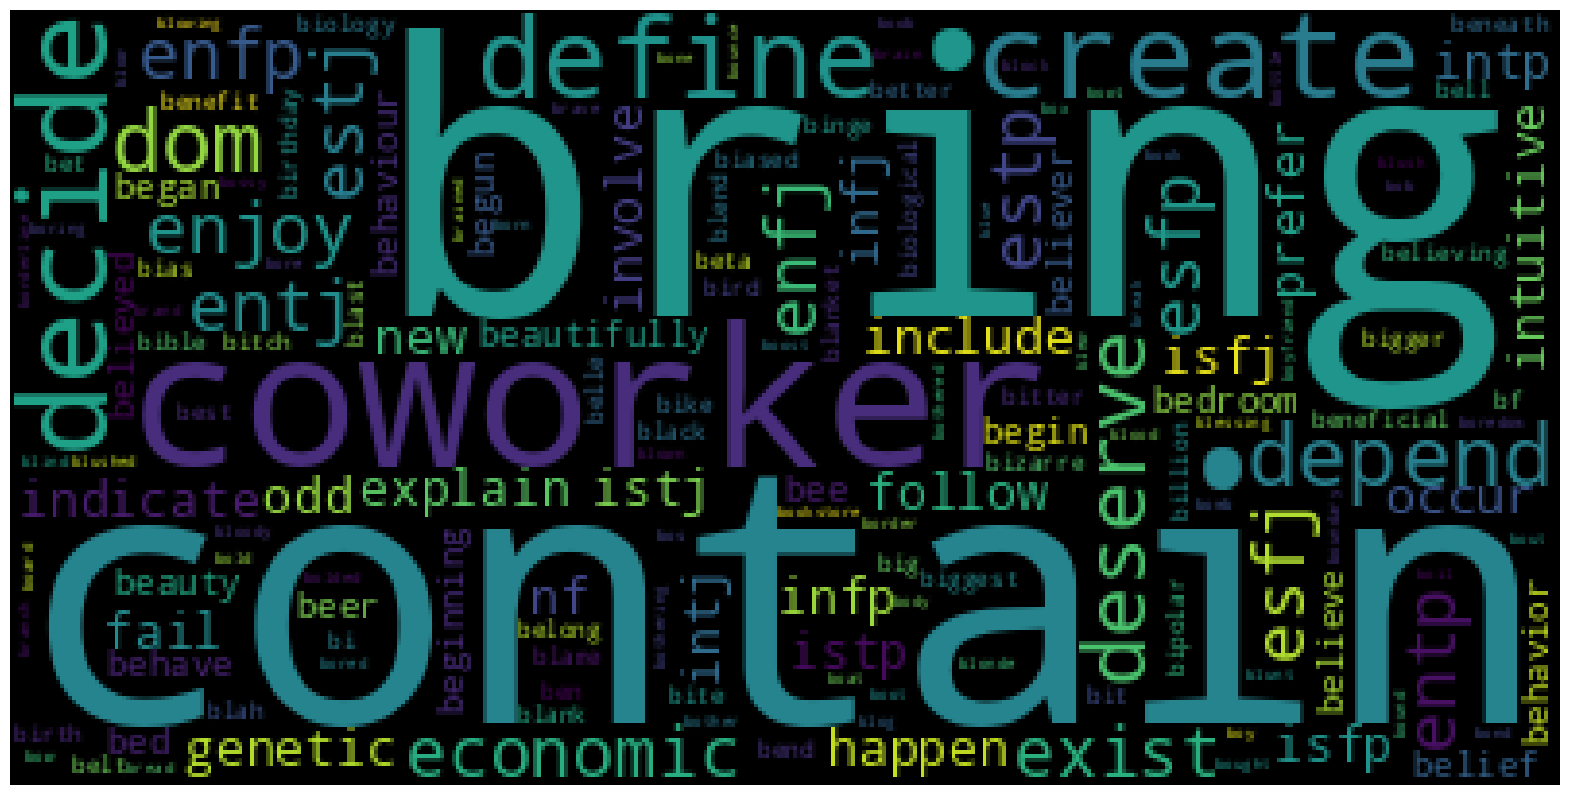

In [ ]:
feature_names=vectorizer.get_feature_names_out()
wc=WordCloud(max_words=400)
wc.generate(' '.join(word for word in feature_names[500:3500]))
plt.figure(figsize=(20,15))
plt.axis('off')
plt.imshow(wc)

In [ ]:
train_post=vectorizer.transform(train_data.posts).toarray()
test_post=vectorizer.transform(test_data.posts).toarray()

In [ ]:
train_post.shape

(6940, 5000)

In [ ]:
target_encoder=LabelEncoder()
train_target=target_encoder.fit_transform(train_data.type)
test_target=target_encoder.fit_transform(test_data.type)

## Model Selection

In [ ]:
models_accuracy={}

## Logistic Regression

In [ ]:
model_log=LogisticRegression(max_iter=3000,C=0.5,n_jobs=-1)
model_log.fit(train_post,train_target)

LogisticRegression(C=0.5, max_iter=3000, n_jobs=-1)

In [ ]:
print('train classification report \n ',classification_report(train_target,model_log.predict(train_post),target_names=target_encoder.inverse_transform([i for i in range(16)])))

train classification report 
                precision    recall  f1-score   support

        ENFJ       0.86      0.16      0.27       152
        ENFP       0.81      0.64      0.72       540
        ENTJ       0.94      0.26      0.41       185
        ENTP       0.82      0.67      0.73       548
        ESFJ       0.00      0.00      0.00        33
        ESFP       0.00      0.00      0.00        38
        ESTJ       0.00      0.00      0.00        31
        ESTP       1.00      0.04      0.08        71
        INFJ       0.73      0.81      0.77      1176
        INFP       0.64      0.93      0.76      1466
        INTJ       0.74      0.81      0.77       873
        INTP       0.69      0.87      0.77      1043
        ISFJ       0.91      0.23      0.37       133
        ISFP       0.85      0.20      0.33       217
        ISTJ       0.84      0.22      0.35       164
        ISTP       0.88      0.48      0.62       270

    accuracy                           0.72      

In [ ]:
print('test classification report \n',classification_report(test_target,model_log.predict(test_post),target_names=target_encoder.inverse_transform([i for i in range(16)])))

test classification report 
               precision    recall  f1-score   support

        ENFJ       1.00      0.08      0.15        38
        ENFP       0.75      0.55      0.63       135
        ENTJ       0.83      0.11      0.19        46
        ENTP       0.67      0.51      0.58       137
        ESFJ       0.00      0.00      0.00         9
        ESFP       0.00      0.00      0.00        10
        ESTJ       0.00      0.00      0.00         8
        ESTP       0.00      0.00      0.00        18
        INFJ       0.65      0.71      0.68       294
        INFP       0.55      0.89      0.68       366
        INTJ       0.63      0.65      0.64       218
        INTP       0.65      0.82      0.72       261
        ISFJ       0.67      0.06      0.11        33
        ISFP       0.88      0.13      0.23        54
        ISTJ       0.50      0.05      0.09        41
        ISTP       0.76      0.43      0.55        67

    accuracy                           0.62      17

In [ ]:
models_accuracy['logistic regression']=accuracy_score(test_target,model_log.predict(test_post))

## Linear Support Vector Classifier

In [ ]:
model_linear_svc=LinearSVC(C=0.1)
model_linear_svc.fit(train_post,train_target)

LinearSVC(C=0.1)

In [ ]:
print('train classification report \n ',classification_report(train_target,model_linear_svc.predict(train_post),target_names=target_encoder.inverse_transform([i for i in range(16)])))
print('test classification report \n',classification_report(test_target,model_linear_svc.predict(test_post),target_names=target_encoder.inverse_transform([i for i in range(16)])))

train classification report 
                precision    recall  f1-score   support

        ENFJ       0.90      0.40      0.55       152
        ENFP       0.84      0.76      0.80       540
        ENTJ       0.91      0.63      0.74       185
        ENTP       0.84      0.81      0.83       548
        ESFJ       0.90      0.27      0.42        33
        ESFP       1.00      0.11      0.19        38
        ESTJ       1.00      0.23      0.37        31
        ESTP       0.94      0.44      0.60        71
        INFJ       0.81      0.85      0.83      1176
        INFP       0.76      0.93      0.84      1466
        INTJ       0.83      0.85      0.84       873
        INTP       0.80      0.89      0.84      1043
        ISFJ       0.91      0.65      0.76       133
        ISFP       0.89      0.56      0.69       217
        ISTJ       0.88      0.65      0.75       164
        ISTP       0.90      0.80      0.85       270

    accuracy                           0.82      

In [ ]:
models_accuracy['Linear Support Vector classifier']=accuracy_score(test_target,model_linear_svc.predict(test_post))

## Support Vector Classifier

In [ ]:
model_svc=SVC()
model_svc.fit(train_post,train_target)

SVC()

In [ ]:
print('train classification report \n ',classification_report(train_target,model_svc.predict(train_post),target_names=target_encoder.inverse_transform([i for i in range(16)])))
print('test classification report \n ',classification_report(test_target,model_svc.predict(test_post),target_names=target_encoder.inverse_transform([i for i in range(16)])))

train classification report 
                precision    recall  f1-score   support

        ENFJ       0.95      0.83      0.89       152
        ENFP       0.95      0.95      0.95       540
        ENTJ       0.98      0.88      0.93       185
        ENTP       0.95      0.95      0.95       548
        ESFJ       1.00      0.58      0.73        33
        ESFP       1.00      0.29      0.45        38
        ESTJ       1.00      0.45      0.62        31
        ESTP       1.00      0.79      0.88        71
        INFJ       0.95      0.97      0.96      1176
        INFP       0.91      0.98      0.95      1466
        INTJ       0.95      0.96      0.96       873
        INTP       0.94      0.97      0.95      1043
        ISFJ       1.00      0.85      0.92       133
        ISFP       0.97      0.86      0.91       217
        ISTJ       0.94      0.90      0.92       164
        ISTP       0.98      0.92      0.95       270

    accuracy                           0.94      

In [ ]:
models_accuracy['Support Vector classifier']=accuracy_score(test_target,model_svc.predict(test_post))

## MultiNomial Naive Bayes

In [ ]:
model_multinomial_nb=MultinomialNB()
model_multinomial_nb.fit(train_post,train_target)

MultinomialNB()

In [ ]:
print('train classification report \n ',classification_report(train_target,model_multinomial_nb.predict(train_post),target_names=target_encoder.inverse_transform([i for i in range(16)])))
print('test classification report \n ',classification_report(test_target,model_multinomial_nb.predict(test_post),target_names=target_encoder.inverse_transform([i for i in range(16)])))

train classification report 
                precision    recall  f1-score   support

        ENFJ       0.00      0.00      0.00       152
        ENFP       1.00      0.01      0.03       540
        ENTJ       0.00      0.00      0.00       185
        ENTP       0.91      0.05      0.10       548
        ESFJ       0.00      0.00      0.00        33
        ESFP       0.00      0.00      0.00        38
        ESTJ       0.00      0.00      0.00        31
        ESTP       0.00      0.00      0.00        71
        INFJ       0.51      0.60      0.55      1176
        INFP       0.35      0.94      0.50      1466
        INTJ       0.79      0.39      0.52       873
        INTP       0.59      0.62      0.60      1043
        ISFJ       0.00      0.00      0.00       133
        ISFP       0.00      0.00      0.00       217
        ISTJ       0.00      0.00      0.00       164
        ISTP       0.00      0.00      0.00       270

    accuracy                           0.45      

In [ ]:
models_accuracy['Multinomial Naive Bayes']=accuracy_score(test_target,model_multinomial_nb.predict(test_post))

## Decision Tree Classifier

In [ ]:
model_tree=DecisionTreeClassifier(max_depth=14)
model_tree.fit(train_post,train_target)

DecisionTreeClassifier(max_depth=14)

In [ ]:
print('train classification report \n ',classification_report(train_target,model_tree.predict(train_post),target_names=target_encoder.inverse_transform([i for i in range(16)])))
print('test classification report \n ',classification_report(test_target,model_tree.predict(test_post),target_names=target_encoder.inverse_transform([i for i in range(16)])))

train classification report 
                precision    recall  f1-score   support

        ENFJ       0.87      0.56      0.68       152
        ENFP       0.90      0.84      0.87       540
        ENTJ       0.78      0.71      0.74       185
        ENTP       0.93      0.75      0.83       548
        ESFJ       0.57      0.39      0.46        33
        ESFP       1.00      0.29      0.45        38
        ESTJ       0.72      0.42      0.53        31
        ESTP       0.81      0.42      0.56        71
        INFJ       0.80      0.86      0.83      1176
        INFP       0.67      0.93      0.78      1466
        INTJ       0.85      0.82      0.83       873
        INTP       0.86      0.82      0.84      1043
        ISFJ       1.00      0.50      0.67       133
        ISFP       0.97      0.66      0.78       217
        ISTJ       0.87      0.55      0.68       164
        ISTP       0.94      0.66      0.77       270

    accuracy                           0.80      

In [ ]:
models_accuracy['Decision Tree classifier']=accuracy_score(test_target,model_tree.predict(test_post))

## Random Forest Classifier

In [ ]:
model_forest=RandomForestClassifier(max_depth=10)
model_forest.fit(train_post,train_target)

RandomForestClassifier(max_depth=10)

In [ ]:
print('train classification report \n ',classification_report(train_target,model_forest.predict(train_post),target_names=target_encoder.inverse_transform([i for i in range(16)])))
print('test classification report \n ',classification_report(test_target,model_forest.predict(test_post),target_names=target_encoder.inverse_transform([i for i in range(16)])))

train classification report 
                precision    recall  f1-score   support

        ENFJ       1.00      0.04      0.08       152
        ENFP       1.00      0.41      0.58       540
        ENTJ       1.00      0.03      0.06       185
        ENTP       0.99      0.54      0.70       548
        ESFJ       0.00      0.00      0.00        33
        ESFP       0.00      0.00      0.00        38
        ESTJ       0.00      0.00      0.00        31
        ESTP       1.00      0.01      0.03        71
        INFJ       0.78      0.82      0.80      1176
        INFP       0.44      0.99      0.61      1466
        INTJ       0.93      0.74      0.82       873
        INTP       0.80      0.85      0.83      1043
        ISFJ       1.00      0.10      0.18       133
        ISFP       1.00      0.03      0.05       217
        ISTJ       1.00      0.02      0.04       164
        ISTP       1.00      0.15      0.26       270

    accuracy                           0.66      

In [ ]:
models_accuracy['Random Forest Classifier']=accuracy_score(test_target,model_forest.predict(test_post))

In [ ]:
models_accuracy

{'logistic regression': 0.624207492795389,
 'Linear Support Vector classifier': 0.661671469740634,
 'Support Vector classifier': 0.6443804034582132,
 'Multinomial Naive Bayes': 0.37060518731988473,
 'Decision Tree classifier': 0.5285302593659942,
 'Random Forest Classifier': 0.4564841498559078}

In [ ]:
models_accuracy.keys()

dict_keys(['logistic regression', 'Linear Support Vector classifier', 'Support Vector classifier', 'Multinomial Naive Bayes', 'Decision Tree classifier', 'Random Forest Classifier'])

In [ ]:
accuarcy=pd.DataFrame(models_accuracy.items(),columns=['Models','Test accuracy'])

In [ ]:
accuarcy.sort_values(by='Test accuracy',ascending=False,ignore_index=True).style.background_gradient(cmap='Blues')

,Models,Test accuracy
0,Linear Support Vector classifier,0.661671
1,Support Vector classifier,0.644380
2,logistic regression,0.624207
3,Decision Tree classifier,0.528530
4,Random Forest Classifier,0.456484
5,Multinomial Naive Bayes,0.370605
